# Phenotype generation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
ped = np.loadtxt("data/hapmap1.ped", usecols=xrange(6, 167074), dtype=int)

In [75]:
# randomly pick 10 SNPs to be causal
np.random.seed(42)
#causal_SNPs = list(np.random.randint(0, high=83534, size=10))
#causal_SNPs.sort()
#print causal_SNPs

causal_SNPs = set([])
while len(causal_SNPs) < 10:
    idx = np.random.randint(0, high=83534)
    if not len(np.where(ped[:, 2*idx]==0)[0]):
            causal_SNPs.add(idx)
causal_SNPs = list(causal_SNPs)
causal_SNPs.sort()

print causal_SNPs

[860, 6265, 15795, 37194, 41090, 44131, 60263, 67221, 76820, 82386]


In [117]:
# randomly pick 9 causal weights (SNP0 and SNP2 will be in epistasis)
np.random.seed(42)
#causal_weights = np.random.uniform(low=-2., high=2., size=9)
causal_weights = np.random.normal(size=9)
print ["%.3f" % w for w in causal_weights]

['0.497', '-0.138', '0.648', '1.523', '-0.234', '-0.234', '1.579', '0.767', '-0.469']


In [82]:
# transform ped into only causal features
print ped.shape
causal_X = np.array([4-(ped[:, idx*2]+ped[:, idx*2+1]) for idx in causal_SNPs]).T
print causal_X.shape

(89, 167068)
(89, 10)


In [84]:
causal_X[:, 0] = causal_X[:, 0]*causal_X[:, 2]

In [86]:
causal_X = np.delete(causal_X, 2, 1)
print causal_X.shape

(89, 9)


In [119]:
y = np.dot(causal_X, causal_weights)
print y.shape

(89,)


[ 0.44173171  0.79332073  0.38501709  0.70615566  0.33101203  0.56526568
  0.5         0.38501709  0.86315833  0.28134876  0.51624204  0.75229799
  0.56526568  0.62834458  0.38502098  0.33127065  0.50710137  0.38501709
  0.56526568  0.38502487  0.56526972  0.50710548  0.62168683  0.35284553
  0.68296571  0.44172766  0.79332073  0.44172766  0.68296571  0.56526568
  0.38501709  0.38501709  0.44172766  0.73691502  0.45752016  0.75230105
  0.44172766  0.79332073  0.5         0.44172766  0.70615225  0.70615225
  0.68908437  0.3310084   0.50710137  0.28135208  0.91201613  0.44172766
  0.57223716  0.56526568  0.5         0.23650846  0.62168683  0.40795696
  0.38502098  0.68119629  0.38501709  0.63024811  0.5         0.44875231
  0.38501709  0.56526568  0.57223716  0.44172766  0.44173171  0.44172766
  0.38501709  0.75229799  0.38501709  0.44173171  0.56526568  0.51420808
  0.5         0.38501709  0.62834458  0.94903334  0.62168683  0.38501709
  0.86315833  0.38501709  0.51624204  0.38502098  0

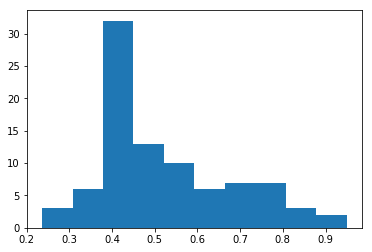

In [120]:
p = np.exp(y)/(np.exp(y)+1)
hist(p)
print p

In [123]:
phe = p>0.5

In [124]:
phe = np.array(phe, dtype=int)
print np.sum(phe)

42


In [139]:
# Read sample names
sample_names = np.loadtxt('data/qt.phe', usecols=0, dtype='S')

In [140]:
# Write phenotype file
np.savetxt('data/phenotype.phe',
           np.vstack((sample_names, np.array(np.ones(89, ), dtype='int'), phe+1)).T,
           fmt='%s %s %s')

Recode the phenotype in the .ped file
  
```
plink --file hapmap1 --pheno phenotype.phe --recode --noweb
mv plink.ped simulated.ped
mv plink.map simulated.ped
```

## Names of causal SNPs

In [2]:
causal_SNPs = [860, 6265, 15795, 37194, 41090, 44131, 60263, 67221, 76820, 82386]

In [4]:
causal_weights = [float(w) for w in ['0.497', '-0.138', '0.648', '1.523', '-0.234', '-0.234', '1.579', '0.767', '-0.469']]

Names of causal SNPs?

In [5]:
import pandas as pd

In [21]:
df = pd.read_csv('data/hapmap1.map', delim_whitespace=True, header=None)

In [33]:
df.iloc[causal_SNPs]

,0,1,2,3
860,1,rs12045968,0,861
6265,1,rs967216,0,6266
15795,3,rs920160,0,15796
37194,7,rs4728546,0,37195
41090,8,rs2078280,0,41091
44131,8,rs6989791,0,44132
60263,12,rs1479019,0,60264
67221,14,rs1190539,0,67222
76820,18,rs1942455,0,76821
82386,22,rs1115764,0,82387


In [37]:
causal_SNPs_names = df.iloc[causal_SNPs][1].values
print causal_SNPs_names

['rs12045968' 'rs967216' 'rs920160' 'rs4728546' 'rs2078280' 'rs6989791'
 'rs1479019' 'rs1190539' 'rs1942455' 'rs1115764']


# Manipulate PLINK output

In [141]:
import pandas as pd

In [38]:
df = pd.read_csv('data/assoc1.assoc', # File name
                 delim_whitespace=True) # Use any white space as delimiter

In [39]:
# sort df by p-value
df_sorted = df.sort_values('P')
print df_sorted[:20]

       CHR         SNP     BP  A1      F_A      F_U  A2  CHISQ             P  \
639      1  rs12045968    861   1  0.45240  0.11700   2  25.01  5.712000e-07   
53018   14   rs1190539  67222   1  0.17860  0.00000   2  18.33  1.857000e-05   
638      1   rs3851890    860   1  0.47620  0.18090   2  17.78  2.486000e-05   
637      1    rs676628    858   1  0.47620  0.19150   2  16.37  5.216000e-05   
5169     1   rs6657743   6707   1  0.16670  0.43480   2  14.84  1.169000e-04   
5887     2   rs1275925   7627   1  0.03571  0.23400   2  14.45  1.437000e-04   
42145   10   rs1172480  53229   1  0.33330  0.61700   2  14.30  1.562000e-04   
44792   11   rs6592035  56619   2  0.19050  0.45740   1  14.27  1.586000e-04   
10141    2   rs6747756  13100   1  0.16670  0.01064   2  13.99  1.834000e-04   
10368    2   rs1474258  13409   1  0.25000  0.05319   2  13.78  2.060000e-04   
18814    4  rs11100479  24195   1  0.10710  0.34040   2  13.62  2.241000e-04   
42144   10    rs756030  53228   1  0.321

## Scores for causal SNPs

In [43]:
snp = causal_SNPs_names[0]
df.loc[df['SNP'].isin(causal_SNPs_names)]

,CHR,SNP,BP,A1,F_A,F_U,A2,CHISQ,P,OR
639,1,rs12045968,861,1,0.45240,0.11700,2,25.01000,5.712000e-07,6.2330
4825,1,rs967216,6266,1,0.00000,0.02128,2,1.80800,1.788000e-01,0.0000
12143,3,rs920160,15796,1,0.45240,0.39360,2,0.62830,4.280000e-01,1.2730
34704,8,rs6989791,44132,2,0.40480,0.43620,1,0.17950,6.718000e-01,0.8790
47671,12,rs1479019,60264,1,0.17860,0.19150,2,0.04902,8.248000e-01,0.9179
53018,14,rs1190539,67222,1,0.17860,0.00000,2,18.33000,1.857000e-05,NaN
60419,18,rs1942455,76821,1,0.08333,0.01064,2,5.46100,1.944000e-02,8.4550
64863,22,rs1115764,82387,1,0.00000,0.07447,2,6.51100,1.072000e-02,0.0000


## Manhattan plot

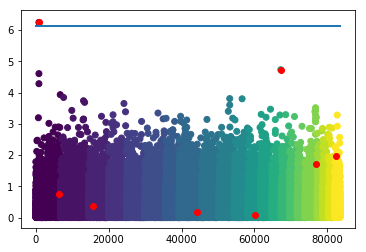

In [45]:
plt.scatter(df.BP, # x = SNP position
            -np.log10(df.P), # y = -log10 p-value (the higher the more significant)
            c=df.CHR) # color by chromosome

# Plot the causal SNPs in red
plt.scatter(df.BP[df['SNP'].isin(causal_SNPs_names)], 
            -np.log10(df.P[df['SNP'].isin(causal_SNPs_names)]),
                     color='red')

# significance threshold according to Bonferroni correction
t = -np.log10(0.05/df.shape[0])
plt.plot([0, max(df.BP)], [t, t], lw=2)

In [169]:
# One significant SNP
print min(df.P)

5.7119999999999993e-07

## Q-Q plot

In [178]:
import scipy.stats as ss

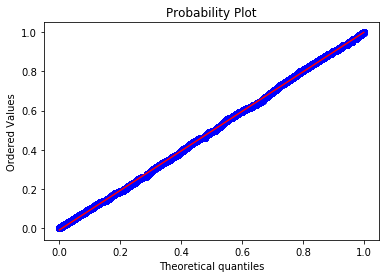

In [180]:
ss.probplot(df.P, dist="uniform", plot=pylab)
plt.show()

In [184]:
df.P[0]

0.73260000000000003

## Does the associated SNP separate cases from controls

## Load data for ML

In [46]:
df = pd.read_csv('data/mydata1.raw', delim_whitespace=True)

In [50]:
y = df.PHENOTYPE.values

In [66]:
# Replace missing values with zeros (don't do this in real life)
df.fillna(0, inplace=True)

In [67]:
X = df.iloc[:, 6:].values

In [68]:
X.shape

(89, 65803)

In [69]:
y.shape

(89,)

## Lasso (no cross-validation)

In [60]:
from sklearn import linear_model

In [81]:
lasso = linear_model.Lasso(alpha=0.1)

In [82]:
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
lasso.coef_.shape

(65803,)

In [95]:
print np.where(lasso.coef_)[0]

[  639  5169 10561 11500 18559 19143 29860 31780 42145 43279 44792 48914
 50846 51849 57450 61895]


In [92]:
#causal_SNPs_indices = [df.columns.get_loc('%s_1' % snp) for snp in causal_SNPs_names]
causal_SNPs_indices = []
for snp in causal_SNPs_names:
    try:
        causal_SNPs_indices.append(df.columns.get_loc('%s_1' % snp))
    except KeyError:
        continue
print causal_SNPs_indices

[645, 4831, 12149, 47677, 53024, 60425, 64869]


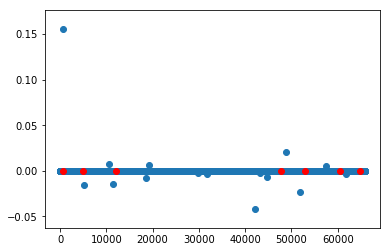

In [93]:
plt.scatter(range(lasso.coef_.shape[0]), # x = SNP position
            lasso.coef_, # y = SNP weight (the higher the more important)
            )

# Plot the causal SNPs in red
plt.scatter(causal_SNPs_indices, 
            lasso.coef_[causal_SNPs_indices],
                     color='red')